### The Growth of Structure
In an expanding universe, gravity has to work against the Hubble flow.
- In a Matter-Dominated universe: $\delta(a) \propto a$. Growth is steady.
- In a Dark Energy universe: Expansion accelerates so fast that gravity can't keep up, and structure growth "freezes."

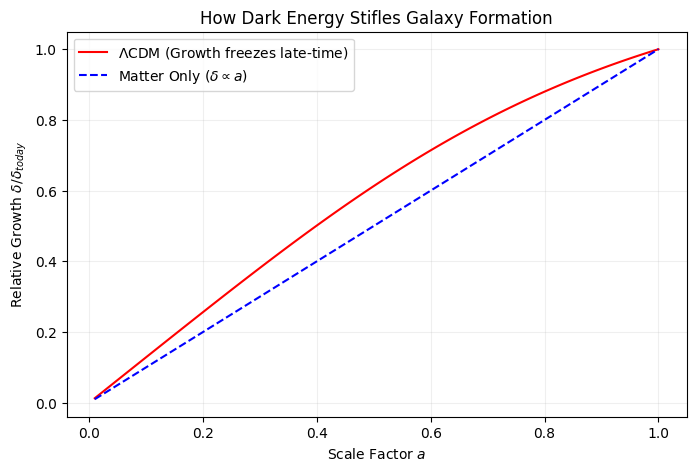

In [1]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
from src.physics_engine import CosmologyEngine

def get_growth_factor(cosmo, a_range):
    """Simple approximation for pedagogical plotting: delta ~ a * g(a)"""
    # Using the Carroll, Press, Turner approximation for the growth suppression factor
    def g(a):
        z = 1/a - 1
        om_z = cosmo.Om0 * (1+z)**3 / (cosmo.hubble_parameter(z)/cosmo.H0)**2
        ol_z = cosmo.Ol0 / (cosmo.hubble_parameter(z)/cosmo.H0)**2
        return 2.5 * om_z / (om_z**(4/7) - ol_z + (1 + om_z/2)*(1 + ol_z/70))
    
    return [a * g(a) for a in a_range]

a_range = np.linspace(0.01, 1.0, 100)
lcdm = CosmologyEngine(Om0=0.3, Ol0=0.7)
matter_only = CosmologyEngine(Om0=1.0, Ol0=0.0)

delta_lcdm = get_growth_factor(lcdm, a_range)
delta_matter = get_growth_factor(matter_only, a_range)

plt.figure(figsize=(8, 5))
plt.plot(a_range, delta_lcdm / delta_lcdm[-1], label='$\Lambda$CDM (Growth freezes late-time)', color='red')
plt.plot(a_range, delta_matter / delta_matter[-1], label='Matter Only ($\delta \propto a$)', color='blue', linestyle='--')

plt.xlabel("Scale Factor $a$")
plt.ylabel("Relative Growth $\delta / \delta_{today}$")
plt.title("How Dark Energy Stifles Galaxy Formation")
plt.legend()
plt.grid(alpha=0.2)
plt.show()